# Module 8 Unit 2
## Use statistical learning to answer a business question 

Insert your code after `# YOUR CODE HERE` and set the random state to 0 where appropriate.  
**NOTE:** This notebook will be graded and will inform the activity submission that follows.  


## Part 1: Supervised learning using a tree-based model

### 1.1 Import libraries

In [1]:
# Import libraries
# General
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import seaborn as sns

# For tree-based model 
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error


### 1.2 Import and explore the insurance claim data

In [2]:
# Import data
df = pd.read_csv('ClaimsData.csv', sep=",")

In [3]:
# Explore the size of the data set
df.shape

(1500, 7)

In [4]:
# Explore type of data and feature names
df.head()

,Claim,Category,Mileage,AgeP,ModelYear,PreOwned,ServHist
0,42089.53,Sedan,99754.4,40,2016,Yes,Yes
1,24097.69,SAV,63926.9,43,2018,No,No
2,19190.63,Small,134829.8,28,2018,No,Yes
3,20574.27,Small,59107.4,28,2018,No,Yes
4,26734.33,SAV,132746.9,22,2017,No,Yes


 #### 1.3 Plot the data

**a) Visualise the continuous variables on a scatterplot**

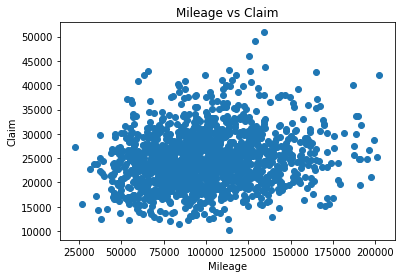

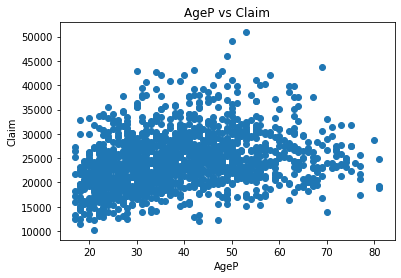

In [5]:
# Plot a scatterplot of y vs the continuous variables (Mileage and AgeP)
plt.scatter(df.loc[:,"Mileage"],df.loc[:,"Claim"])
plt.title('Mileage vs Claim')
plt.ylabel('Claim')
plt.xlabel('Mileage')
plt.show()

plt.scatter(df.loc[:,"AgeP"],df.loc[:,"Claim"])
plt.title('AgeP vs Claim')
plt.ylabel('Claim')
plt.xlabel('AgeP')
plt.show()

**b) Compare the mean claim amount for categorical variables**  

In [6]:
# Calculate the mean claim amount of pre-owned and not pre-owned vehicles
df.groupby('PreOwned')['Claim'].mean().round(2)

PreOwned
No     23435.09
Yes    26987.04
Name: Claim, dtype: float64

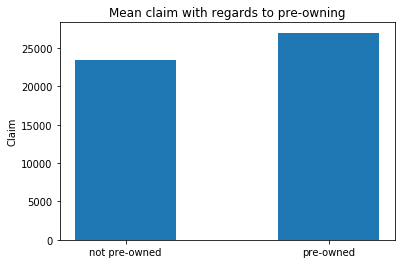

In [7]:
# Plot the pre-owned vs non-pre-owned vehicles
not_preowned = df.groupby('PreOwned')['Claim'].mean()[0]
preowned = df.groupby('PreOwned')['Claim'].mean()[1]

plt.bar(np.arange(2), [not_preowned, preowned], width=0.5)
plt.xticks(np.arange(2),("not pre-owned", "pre-owned"))
plt.title('Mean claim with regards to pre-owning')
plt.ylabel('Claim')

plt.show()

In [8]:
# Calculate the mean claim amount of vehicles with and without service histories
df.groupby('ServHist')['Claim'].mean().round(2)

ServHist
No     24368.47
Yes    24780.54
Name: Claim, dtype: float64

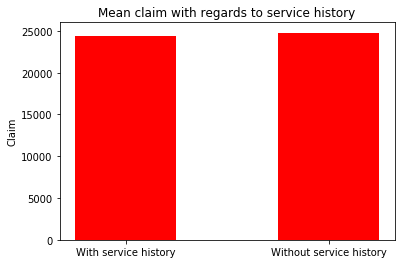

In [9]:
# Plot the mean claim amount of vehicles with and without service histories
no_servhist = df.groupby('ServHist')['Claim'].mean()[0]
servhist = df.groupby('ServHist')['Claim'].mean()[1]

plt.bar(np.arange(2), [no_servhist, servhist],color="red", width=0.5)
plt.xticks(np.arange(2),("With service history", "Without service history"))
plt.title('Mean claim with regards to service history')
plt.ylabel('Claim')

plt.show()

In [10]:
# Calculate the mean claim amount of vehicles in each category
df.groupby('Category')['Claim'].mean().round(2)

Category
SAV      25567.22
SUV      29439.96
Sedan    23759.34
Small    21458.09
Super    33107.50
Name: Claim, dtype: float64

In [11]:
# Calculate the mean claim amount of vehicles for each model year
df.groupby('ModelYear')['Claim'].mean().round(2)

ModelYear
2011    21251.20
2012    22089.08
2013    22797.42
2014    24559.40
2015    24396.63
2016    24930.40
2017    24859.32
2018    24844.63
2019    25487.11
Name: Claim, dtype: float64

#### 1.4 Prepare the data

In [12]:
# Check that there are no missing values
print(df.isnull().sum()) 

Claim        0
Category     0
Mileage      0
AgeP         0
ModelYear    0
PreOwned     0
ServHist     0
dtype: int64


In the next cell, you will one-hot encode the `Category` variable. Recall one hot encoding was performed in the 3.6 IDE activity in the M3U3 notebook. You may also refer to the scikit-learn [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html) and [user guide](https://scikit-learn.org/stable/modules/preprocessing.html#encoding-categorical-features).

In [13]:
# One-hot encode the "Category" variable and add the encoded feature to the dataframe 
# Name the new columns (hint: columns = ohe.get_feature_names())
# YOUR CODE HERE
ohe = OneHotEncoder(categories='auto')
Xd = ohe.fit_transform(df.Category.values.reshape(-1, 1)).toarray()
df_ohe = pd.DataFrame(Xd, columns = ohe.get_feature_names())

# Add encoded feature to the dataframe and view the new dataframe with .head()
# YOUR CODE HERE
df2 = pd.concat([df, df_ohe], axis=1)
df2.head()

,Claim,Category,Mileage,AgeP,ModelYear,PreOwned,ServHist,x0_SAV,x0_SUV,x0_Sedan,x0_Small,x0_Super
0,42089.53,Sedan,99754.4,40,2016,Yes,Yes,0.0,0.0,1.0,0.0,0.0
1,24097.69,SAV,63926.9,43,2018,No,No,1.0,0.0,0.0,0.0,0.0
2,19190.63,Small,134829.8,28,2018,No,Yes,0.0,0.0,0.0,1.0,0.0
3,20574.27,Small,59107.4,28,2018,No,Yes,0.0,0.0,0.0,1.0,0.0
4,26734.33,SAV,132746.9,22,2017,No,Yes,1.0,0.0,0.0,0.0,0.0


Choose the following variables as features: `Mileage`, `AgeP`, and `Category0` to `Category4`. You may use the `.loc[]` or `.iloc[]` method.


In [14]:
# Split data into features (X) and response (y) 
# YOUR CODE HERE
X = df2.iloc[:, np.r_[3, 7:12]]
y = df2.loc[:, ["Mileage"]]

In [15]:
X.head()

,AgeP,x0_SAV,x0_SUV,x0_Sedan,x0_Small,x0_Super
0,40,0.0,0.0,1.0,0.0,0.0
1,43,1.0,0.0,0.0,0.0,0.0
2,28,0.0,0.0,0.0,1.0,0.0
3,28,0.0,0.0,0.0,1.0,0.0
4,22,1.0,0.0,0.0,0.0,0.0


In [16]:
y.head()

,Mileage
0,99754.4
1,63926.9
2,134829.8
3,59107.4
4,132746.9


#### 1.5 Split the data into a training and test set

Recall that, in the 3.3 IDE activity M3U2 practice notebook, the steps in the following cell were introduced. You may also reference the documentation on the [scikit-learn website](https://scikit-learn.org/stable/index.html) for the following:
* train_test_split()
* DecisionTreeRegressor()
* mean_squared_error()

Refer to the [Statistics How To website](https://https://colab.research.google.com/drive/1wfRShfsk2dnKEEalLzLequOW1lhecpjh#scrollTo=DVGEnOihV4M0&line=6&uniqifier=1) for more information on mean squared error.

In [17]:
# Split the data into the training set and test set 
# Set random_state=0
# YOUR CODE HERE
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
print(X_train.shape,X_test.shape)

# Fit data to tree-based model
# Set random_state=0
# YOUR CODE HERE
reg = DecisionTreeRegressor(random_state=0)
reg.fit(X_train, y_train)

# What is the mean squared error (MSE) prior to pruning?
# Assign the MSE to the variable name "error"
# YOUR CODE HERE
y_pred = reg.predict(X_test)
error = mean_squared_error(y_test, y_pred)

# Print the MSE before pruning
print("MSE:", error)

(1125, 6) (375, 6)
MSE: 1071571123.6661712


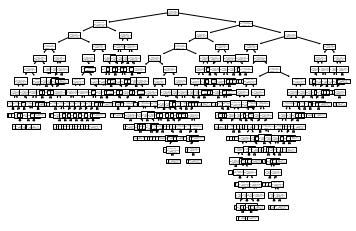

In [18]:
# Plot the unpruned tree
plt.figure()
plot_tree(reg,feature_names=X.columns)
plt.show()

In [19]:
# Replace "reg" with the variable name you chose in "Fit data to tree-based model" above
print("Tree depth =",reg.get_depth(),'\n'
      "Number of leaves =",reg.get_n_leaves())

Tree depth = 18 
Number of leaves = 227


In [20]:
# Finding the optimal number of leaf nodes
nodes = [node for node in range(2,35)]     

regs = []
for node in nodes:
    reg2 = DecisionTreeRegressor(random_state=0, 
                                         max_leaf_nodes=node)
    reg2.fit(X_train, y_train)
    regs.append(reg2)

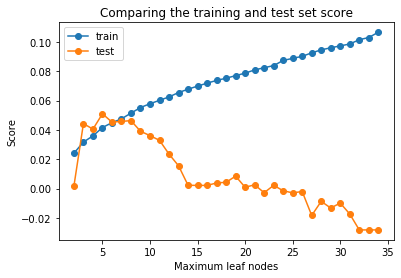

In [21]:
# Visualise the performance of each subtree on the training and test set
train_scores = [reg.score(X_train, y_train) for reg in regs]
test_scores = [reg.score(X_test, y_test) for reg in regs]

fig, ax = plt.subplots()
ax.set_xlabel("Maximum leaf nodes")
ax.set_ylabel("Score")
ax.set_title("Comparing the training and test set score")
ax.plot(nodes, train_scores, marker='o', label="train")
ax.plot(nodes, test_scores, marker='o', label="test")
ax.legend()
plt.show()

In [22]:
# To find the optimal maximum leaf nodes, cross validation is applied
validation_scores = []
for node in nodes:
    reg3 = DecisionTreeRegressor(random_state=0, max_leaf_nodes=node)
    score = cross_val_score(estimator=reg3, X=X_train, y=y_train, cv=5)   
    validation_scores.append(score.mean())

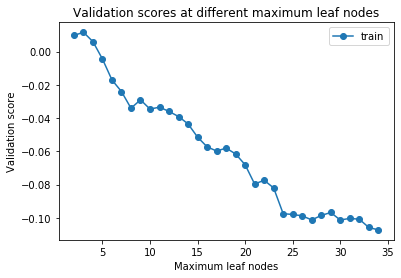

In [23]:
# Visualise the validation score in relation to maximum leaf nodes
plt.figure()
plt.xlabel("Maximum leaf nodes")
plt.ylabel("Validation score")
plt.title("Validation scores at different maximum leaf nodes")
plt.plot(nodes, validation_scores, marker='o', label="train")
plt.legend()
plt.show()

In [24]:
# Obtain the maximum leaf nodes with the highest validation score
nodes_optimum = nodes[validation_scores.index(max(validation_scores))]
print(nodes_optimum)

3


In [25]:
# Use the optimum maximum leaf nodes to fit a parsimonious tree 
# Set random_state=0
# YOUR CODE HERE
reg4 = DecisionTreeRegressor(random_state=0, min_samples_leaf=nodes_optimum)
reg4.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=3, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

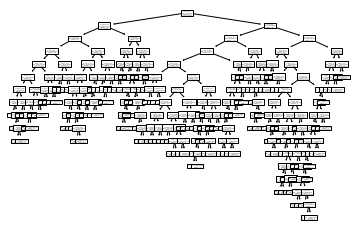

In [26]:
# Visualise the smaller pruned tree
plt.figure()
plot_tree(reg4, feature_names=X_train.columns)
plt.show()

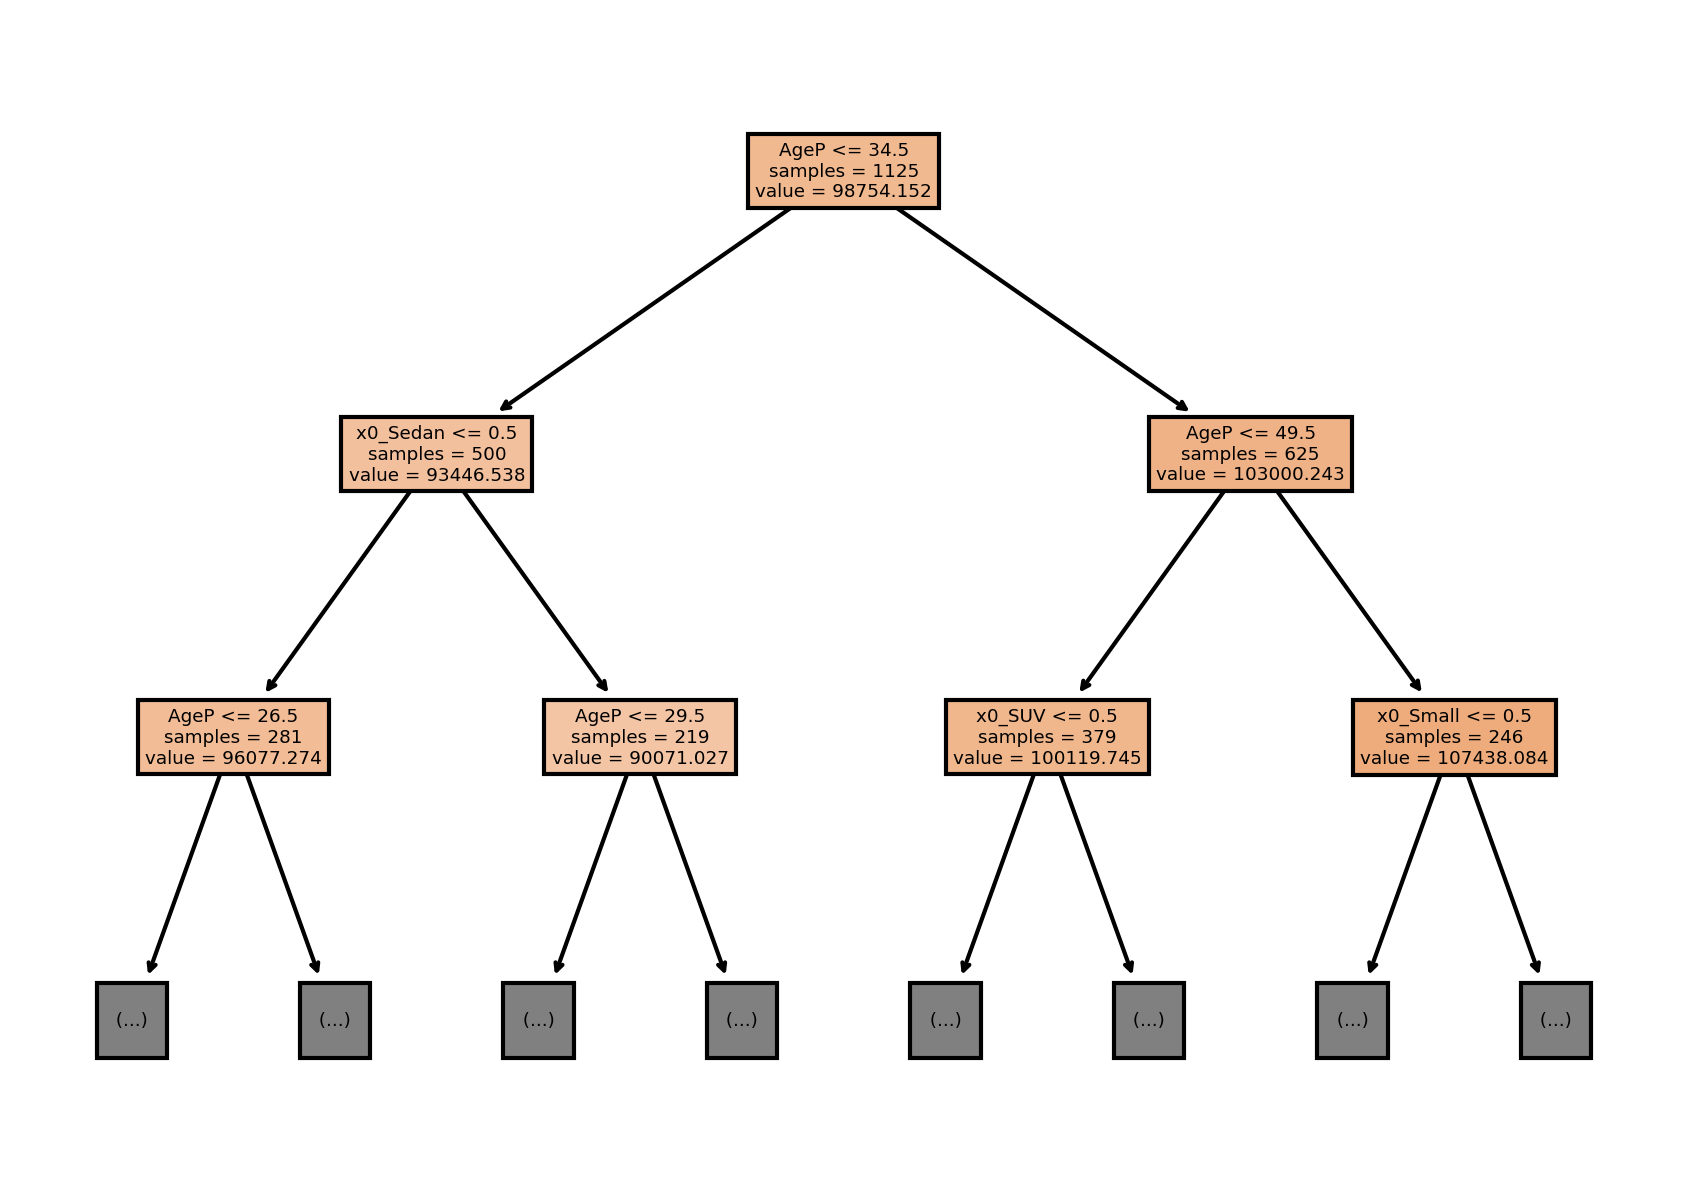

In [27]:
# Show the first few levels of the tree
plt.figure(figsize=[7,5], dpi=300)
plot_tree(reg4, max_depth=2,
          feature_names=X_train.columns, 
          filled=True,impurity=False)
plt.show()

1.  Recall the node to the left indicates that the above criterion is true while the node to the right indicates that it is false.
   * left = true
   * right = false
2. For nodes splitting on a categorical variable:
   * node left of `<= 0.5` = 0
   * node right of `<= 0.5` = 1

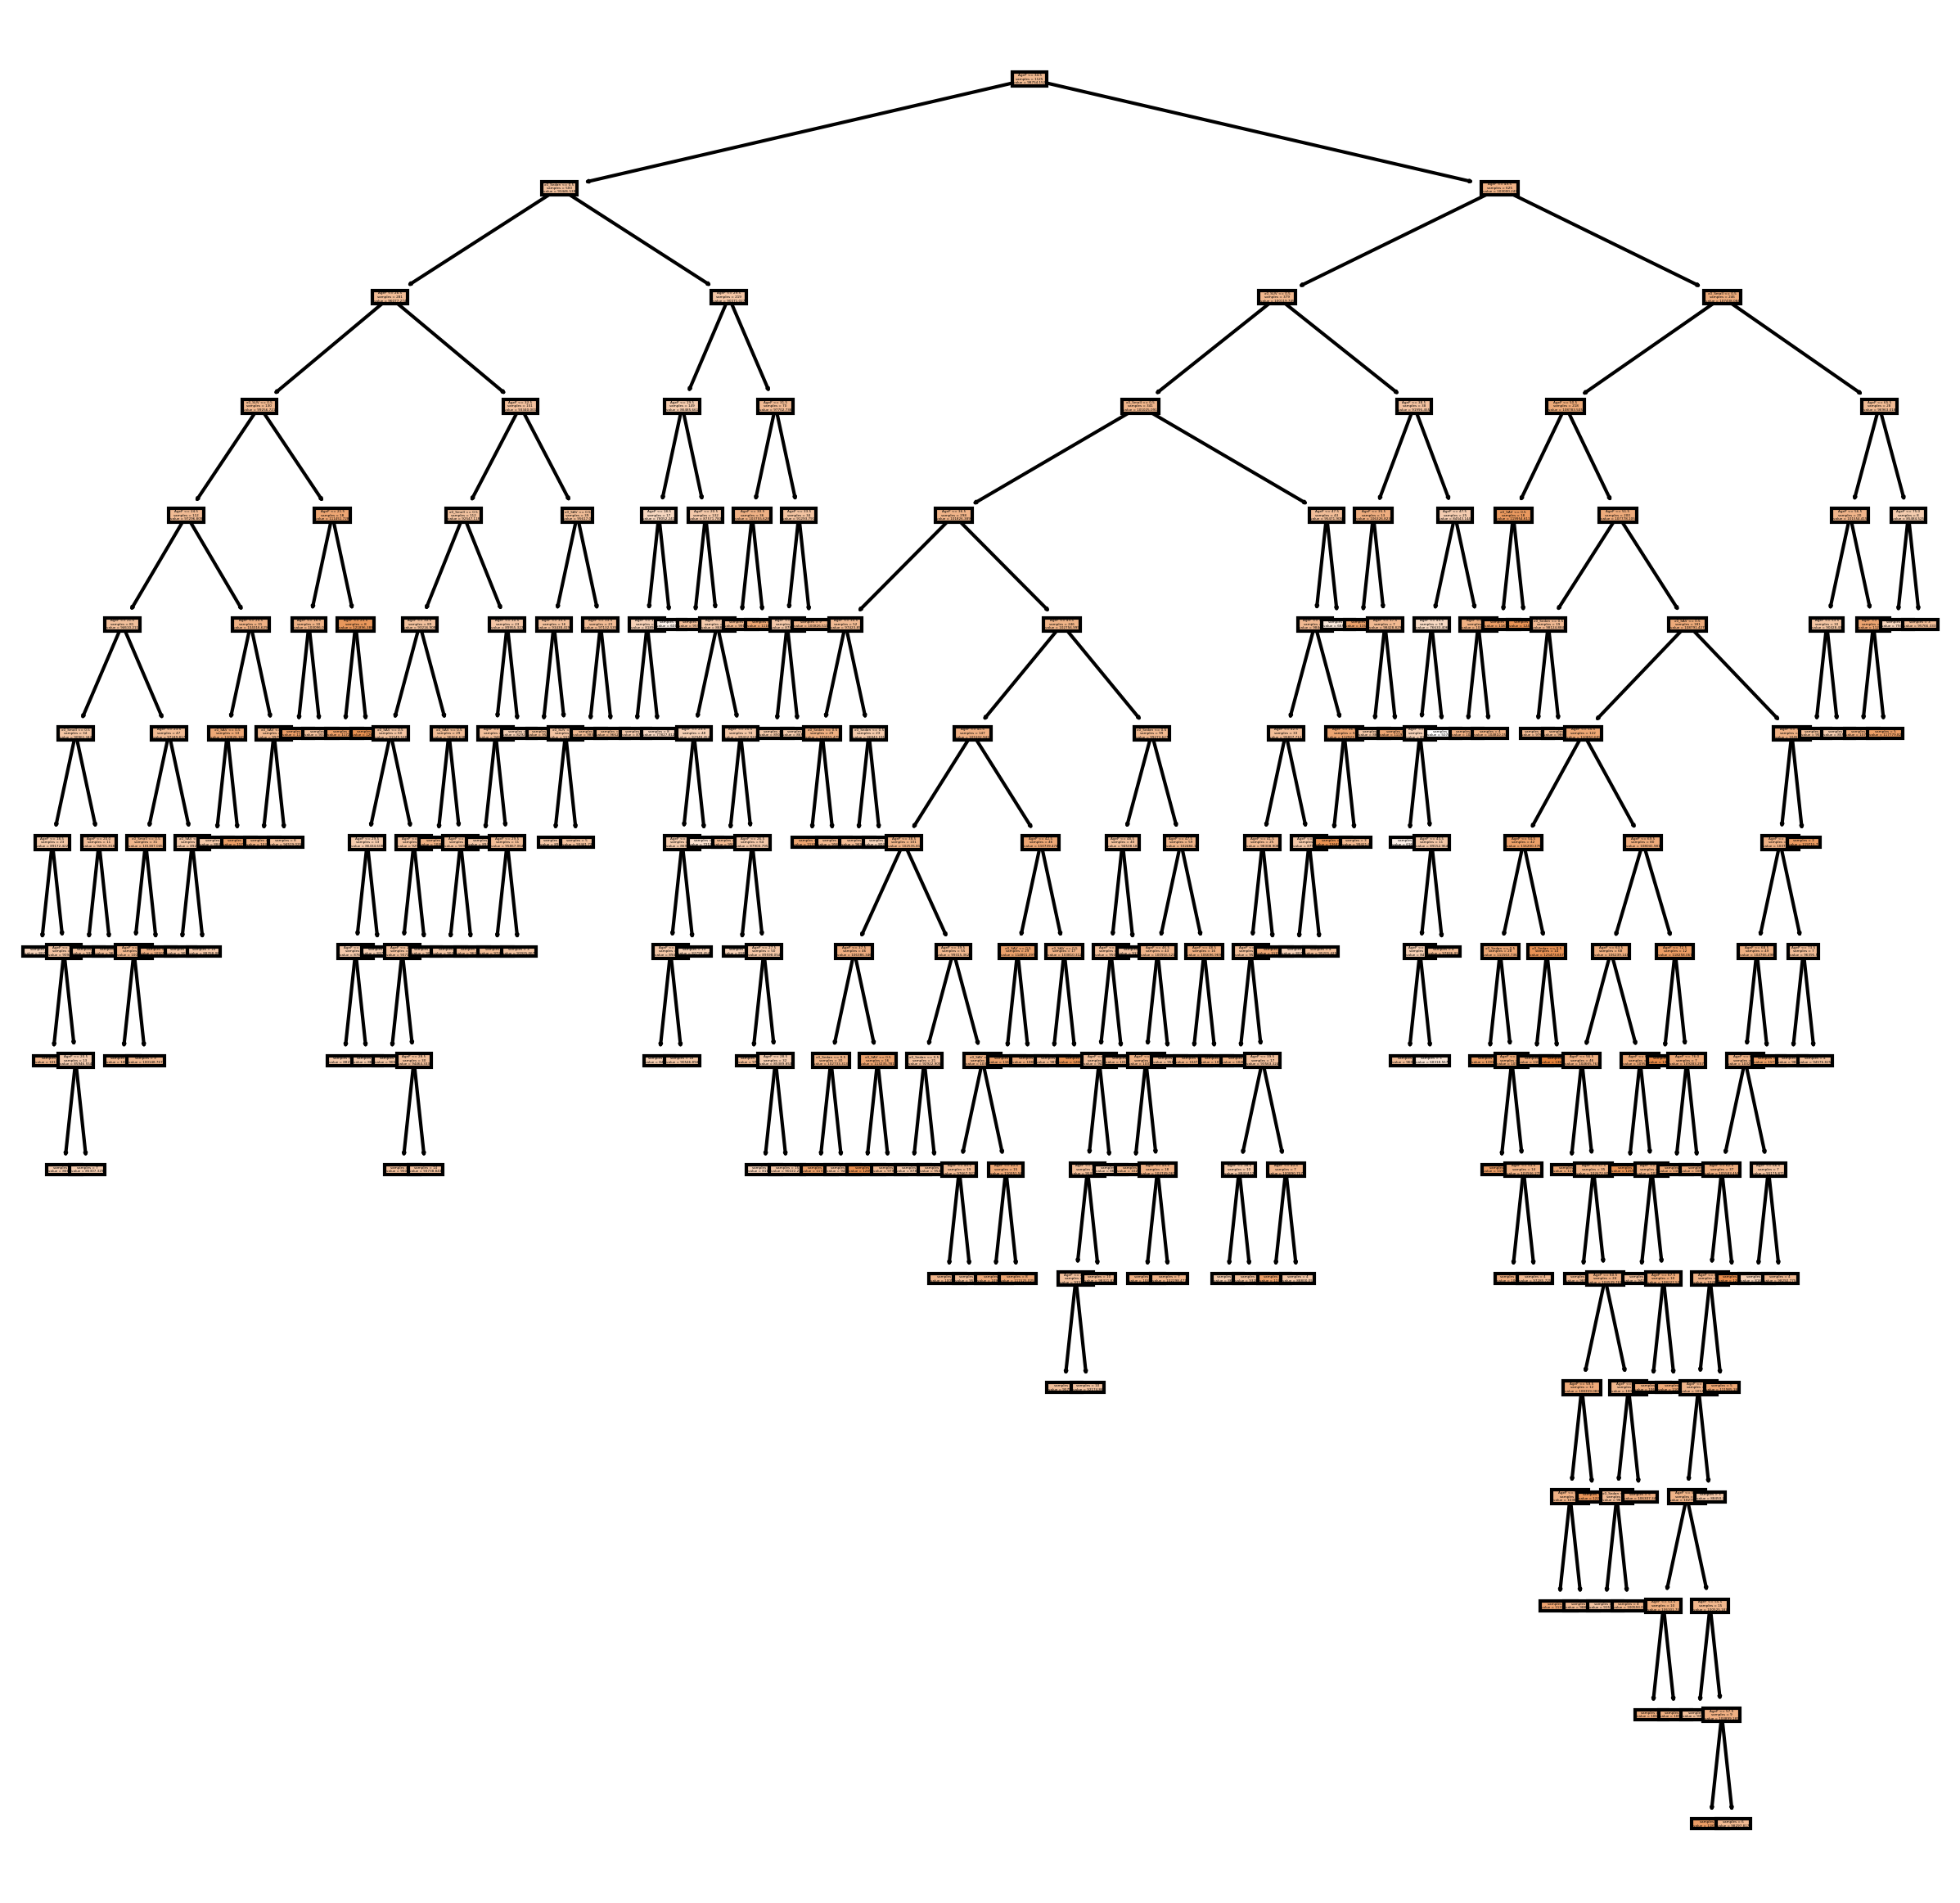

In [28]:
# Save the plot as an image to read the information in the nodes
plt.figure(figsize=[10,10], dpi=300)
plot_tree(reg4, 
          feature_names=X_train.columns, 
          filled=True,impurity=False)
 
plt.savefig('ClaimsDataSet_tree.png');

In [29]:
# Final test to see how the model performs: 
# Assign the MSE to the variable name "error2"
# YOUR CODE HERE
y_pred = reg4.predict(X_test)
error2 = mean_squared_error(y_test, y_pred)

print("MSE before pruning = %s"%(error))
print("MSE of the optimal tree = %s"%(error2)) 

# This mean squared error is approximately half the unpruned tree's mean squared error

MSE before pruning = 1071571123.6661712
MSE of the optimal tree = 1057493035.0816242


In [30]:
# What is the final model to be used for predictions in future? 
# Set random_state=0
# YOUR CODE HERE
best_model = DecisionTreeRegressor(random_state=0, min_samples_leaf=3)
best_model.fit(X, y)
print("Tree depth =", best_model.get_depth(), '\n'
     "Number of leaves =", best_model.get_n_leaves())

Tree depth = 13 
Number of leaves = 171


In Part 1, you explored the claims data, fitted the data to a tree-based model, and produced a decision tree diagram. Consider what you can interpret and conclude from the exploratory graphs and the final decision tree before continuing to the following part of this notebook.

## Part 2: Unsupervised learning

### 2.1 Import and explore the basic characteristics of the  fitness tracker data set

**Note:** Best practice is to import all libraries at the beginning of a notebook; however, since this notebook is split into two parts, some libraries are imported here again for ease of reference.

In [31]:
# Import libraries
# General 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import seaborn as sns

# For clustering algorithms
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import cdist

# K-means clustering
from sklearn.cluster import KMeans

# Agglomerative hierarchical clustering
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

In [32]:
# Import data and print the shape of the data
df = pd.read_csv("FitnessTrackerData.txt",delimiter=" ")
print(df.shape)

(300, 3)


In [33]:
# Explore the type of data and feature names
df.sample(8)

,Pace,Distance,Frequency
283,4.708406,10.488794,1.465793
170,4.696014,14.151363,2.580525
231,4.810639,10.365046,1.203209
193,5.353604,15.964615,3.098745
228,5.183759,10.046568,0.990690
145,3.970851,13.987275,2.920771
95,5.570560,11.901196,2.459174
24,4.151562,13.327125,2.360664


In [34]:
# For consistency, make the data X
X = df.copy()

### 2.2 Plot the data

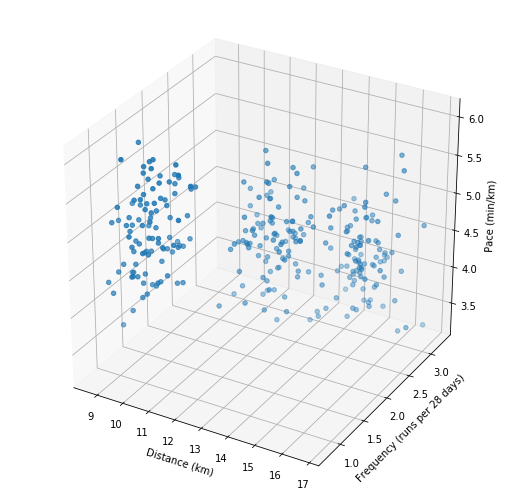

In [35]:
# Plot a three-dimensional plot of the data
fig = plt.figure(figsize=(9,9))
ax = plt.axes(projection="3d")

x_points = X.loc[:,"Distance"]
y_points = X.loc[:,"Frequency"]
z_points = X.loc[:,"Pace"]

ax.set_xlabel("Distance (km)")
ax.set_ylabel("Frequency (runs per 28 days)")
ax.set_zlabel("Pace (min/km)")

ax.scatter3D(x_points, y_points, z_points);

plt.show()

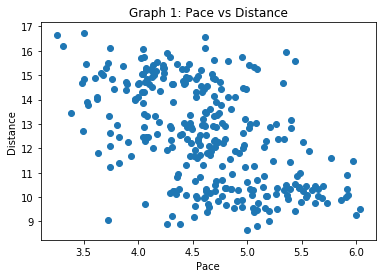

In [36]:
# Plot Pace vs Distance
plt.scatter(X.loc[:,"Pace"],X.loc[:,"Distance"])
plt.title('Graph 1: Pace vs Distance')
plt.xlabel('Pace')
plt.ylabel("Distance")
plt.show()

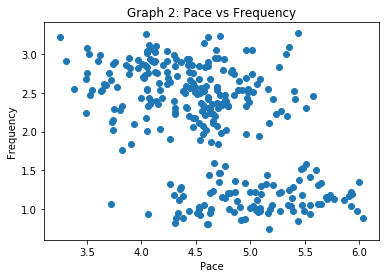

In [37]:
# Plot Pace vs Frequency
plt.scatter(X.loc[:,"Pace"],X.loc[:,"Frequency"])
plt.title('Graph 2: Pace vs Frequency')
plt.xlabel('Pace')
plt.ylabel('Frequency')
plt.show()

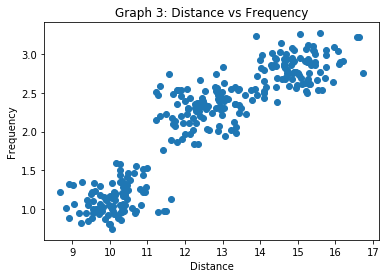

In [38]:
# Plot Distance vs Frequency
plt.scatter(X.loc[:,"Distance"],X.loc[:,"Frequency"])
plt.title('Graph 3: Distance vs Frequency')
plt.xlabel('Distance')
plt.ylabel('Frequency')
plt.show()

**Make some inferences about the data**
1. Are there any patterns you can identify in Graph 1: Pace vs Distance for different groups of runners? 
2. By visually inspecting Graph 2 and Graph 3, how many clusters do you think there are?

### 2.3 K-means clustering

Refer to the Module 6 IDE activities to guide you in performing K-means clustering.

#### 2.3.1 Find the optimal number of clusters

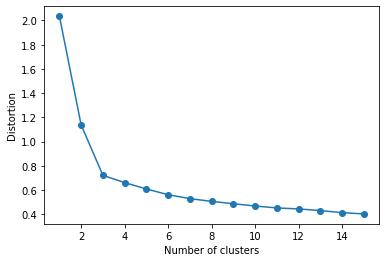

In [39]:
# 1. Elbow method 
# Calculate distortions 
# Set random_state=0 and use init='k-means++'
distortions = []
# YOUR CODE HERE
for i in range(1, 16):
    km = KMeans(n_clusters=i, init='k-means++', n_init=10,
               max_iter=300, tol=1e-04, random_state=0)
    km.fit(X)
    distortions.append(sum(np.min(cdist(X, km.cluster_centers_,
                                       'euclidean'),axis=1)) / X.shape[0])

# Plot distortions
plt.plot(range(1, 16), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

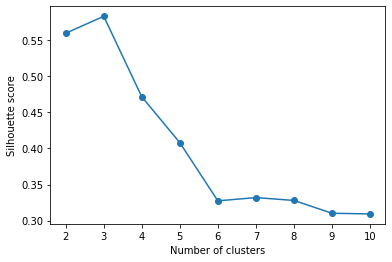

In [40]:
# 2. Silhouette method 
sil = []
kmax = 10
# YOUR CODE HERE
for k in range(2, kmax+1):
    kmeans = KMeans(n_clusters=k).fit(X)
    labels = kmeans.labels_
    sil.append(silhouette_score(X, labels, metric='euclidean'))

# Plot
plt.plot(range(2, kmax+1), sil, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.show()

#### 2.3.2 Cluster the data using the scikit-learn K-means algorithm

In [41]:
# Cluster the data 
# Hint: km = KMeans(....,init='k-means++', random_state=0)
# YOUR CODE HERE
km = KMeans(n_clusters=3, init='k-means++',
           n_init=10, max_iter=300,
           tol=1e-04, random_state=0)
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [42]:
# Add the cluster labels to the dataframe 
# Set random_state=0
# YOUR CODE HERE
Xnew = X.copy()
Xnew["CLUSTERS"] = km.labels_
Xnew.sample(8, random_state=0)

,Pace,Distance,Frequency,CLUSTERS
208,5.734379,9.749187,1.175090,0
188,4.164663,15.184689,2.630416,1
12,4.551373,12.282242,2.262886,2
221,5.065831,11.281043,0.959691,0
239,4.765949,10.701846,1.560003,0
136,4.318200,14.652788,2.936755,1
230,5.393464,11.439544,0.975832,0
206,4.863134,10.926031,1.217446,0


#### 2.3.3 Plot the clusters generated by the K-means algorithm

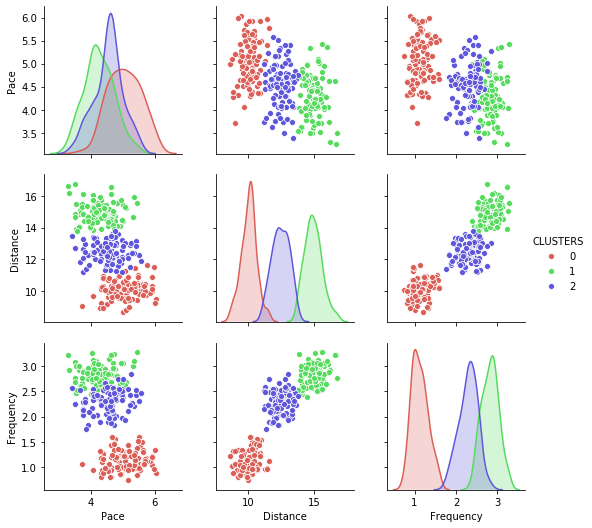

In [43]:
# Plot all variables and their clusters using seaborn 
# YOUR CODE HERE
var = ['Pace', 'Distance', 
       'Frequency']

sns.pairplot(Xnew, vars=var, hue="CLUSTERS", palette=sns.color_palette("hls", 3))

In this part of the activity, you used the elbow method and the silhouette score to determine how many clusters to use for K-means clustering, clustered the data, and plotted the results. What insights can you gain from the pair-wise plots for this data set?

### 2.4 Hierarchical clustering

Refer to the Module 7 IDE activities to guide you in performing hierarchical clustering.

#### 2.4.1 Find the optimal number of clusters
Compare two linkage methods to each other. Choose from this list: `“ward”`, `“complete”`, `“average”`, `“single”`. 

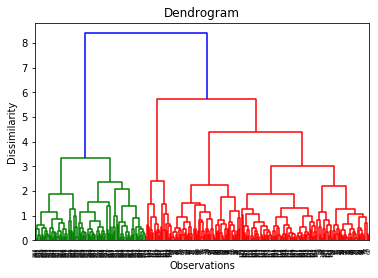

In [44]:
# Plot the dendrogram with your first choice of linkage method 
# Hint: Use dendrogram()
# YOUR CODE HERE
dendro = dendrogram(linkage(X, method = "complete"))

# Note that it may take a while for this graph to be generated
plt.title('Dendrogram')
plt.ylabel('Dissimilarity')
plt.xlabel('Observations')
plt.show()

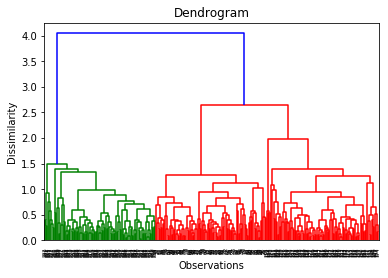

In [45]:
# Plot the dendrogram with your second choice of linkage method 

# YOUR CODE HERE
dendro2 = dendrogram(linkage(X, method = "average"))

# Note that it may take a while for this graph to be generated
plt.title('Dendrogram')
plt.ylabel('Dissimilarity')
plt.xlabel('Observations')
plt.show()

* Were there differences in the dendrogram depending on the linkage method you used?
* How many clusters do you think should be specified?

#### 2.4.2 Cluster the data using the scikit-learn `AgglomerativeClustering` algorithm

**Group the data into two clusters**

In [46]:
# Run the agglomerative clustering algorithm using two clusters and the linkage method of your choice 
# Hint: n_clusters=2
# YOUR CODE HERE
hc = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'complete')

y_hc = hc.fit_predict(X)

In [47]:
# Set up dataframe with cluster labels 
# Set random_state=0
# YOUR CODE HERE
Xnew2 = X.copy()
Xnew2["CLUSTERS"] = y_hc
Xnew2.sample(10, random_state=0)

,Pace,Distance,Frequency,CLUSTERS
208,5.734379,9.749187,1.175090,1
188,4.164663,15.184689,2.630416,0
12,4.551373,12.282242,2.262886,0
221,5.065831,11.281043,0.959691,1
239,4.765949,10.701846,1.560003,1
136,4.318200,14.652788,2.936755,0
230,5.393464,11.439544,0.975832,1
206,4.863134,10.926031,1.217446,1
52,4.981272,11.215898,2.508583,0
108,4.755913,14.431425,2.945011,0


**Plots with two clusters**

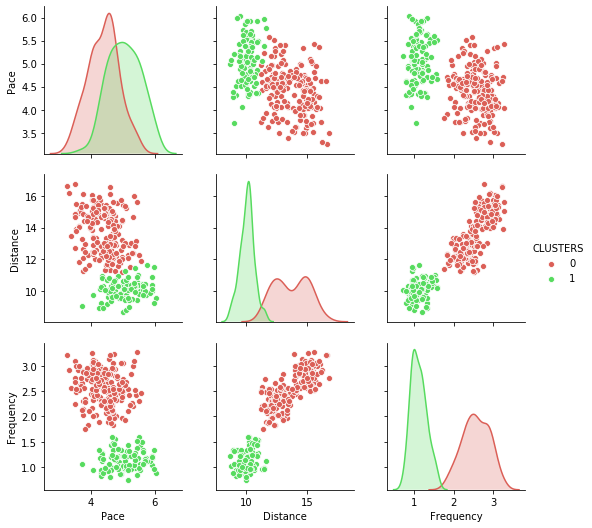

In [48]:
# Plot all the variables and their clusters using seaborn 
# YOUR CODE HERE
var2 = ["Pace", "Distance", "Frequency"]
sns.pairplot(Xnew2, vars=var2, hue="CLUSTERS", palette=sns.color_palette("hls", 3))

**Group the data into three clusters**

In [49]:
# Run the agglomerative clustering algorithm using three clusters and the linkage method of your choice 
# Hint: n_clusters=3
# YOUR CODE HERE
hc2 = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'complete')
y_hc2 = hc2.fit_predict(X)

In [50]:
# Set up dataframe with cluster labels 
# Set random_state=0
# YOUR CODE HERE
Xnew3 = X.copy()
Xnew3["CLUSTERS"] = y_hc2
Xnew3.sample(10, random_state=0)

,Pace,Distance,Frequency,CLUSTERS
208,5.734379,9.749187,1.175090,1
188,4.164663,15.184689,2.630416,0
12,4.551373,12.282242,2.262886,0
221,5.065831,11.281043,0.959691,1
239,4.765949,10.701846,1.560003,1
136,4.318200,14.652788,2.936755,0
230,5.393464,11.439544,0.975832,1
206,4.863134,10.926031,1.217446,1
52,4.981272,11.215898,2.508583,0
108,4.755913,14.431425,2.945011,0


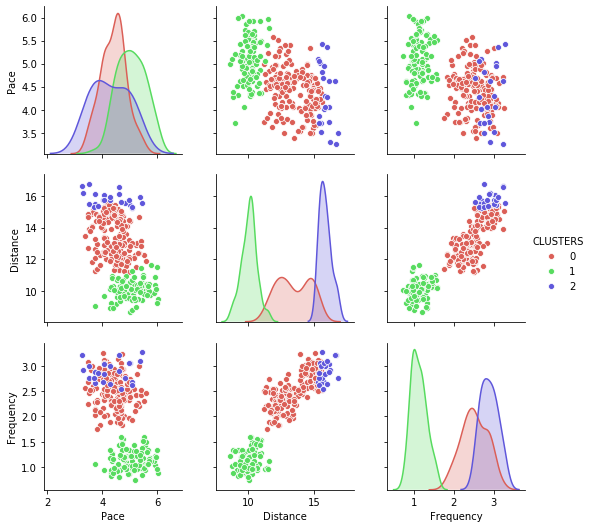

In [51]:
# Plot all the variables and their clusters using seaborn 
# YOUR CODE HERE
var3 = ["Pace", "Distance", "Frequency"]
sns.pairplot(Xnew3, vars=var3, hue="CLUSTERS", palette=sns.color_palette("hls", 3))

In this part of the activity, you created a dendrogram, clustered the data, and plotted the data with clusters. Do you think two or three clusters is more appropriate? Is there a difference between the K-means plot and the hierarchical clustering plots you generated? 

Continue to the activity submission to answer questions related to this analysis.